# 1. Perkenalan


## Live Code 3

_Live Code 3 ini dikerjakan oleh:_

Nama : **Rizal Aditya**

Batch : **008**

---
## Abstrack

Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini terkait dengan pemilihan negara mana yang paling membutuhkan bantuan. 

### Task
Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. Anda diwajibkan untuk menyarankan negara mana yang perlu menjadi fokus CEO. Jawab pertanyaan dibawah ini sebagai acuan analisa/cerita : 

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

[Dataset URL](https://www.kaggle.com/hellbuoy/pca-kmeans-hierarchical-clustering)

# 2. Import library

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patheffects as pe

#Sklearn
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# 3. Data Loading

In [4]:
# Import Dataset Original
data_ori = pd.read_csv('data/country-data.csv')

# Copy Dataset yang akan kita gunakan
data_county = data_ori.copy()
print(f"Jumlah baris dari dataset ini adalah : {data_county.shape[0]}")
print(f"Jumlah kolom dari dataset ini adalah : {data_county.shape[1]}")
data_county.sample(5) # Melihat 5 data secara acak

Jumlah baris dari dataset ini adalah : 167
Jumlah kolom dari dataset ini adalah : 10


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648
79,Kazakhstan,21.5,44.2,4.29,29.9,20100,19.500,68.4,2.60,9070
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610


Dari hasil inforamasi dataset diatas mengenaik data-data berbagai negara. 

Dataset ini memiliki **167** baris data dan **10** kolom.


In [5]:
# melihat informasi dataset lebih lanjut.
data_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Dari informasi dataset diatas, dapat dilihat bahwa dataset ini memiliki 2 tipe data, yaitu numerikal dan categorical.

Kategorikal adalah nama negara, sedangkan numerikal adalah informasi yang spesifik mengenai informasi dari setiap negara.

Dari informasi diatas juga terlihat bahwa setiap kolom tidak memiliki data yang kurang (missing value).

In [8]:
# melihat statistik deskriptif mengenai dataset ini.
data_county.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Dari hasil inforasi statistik sederhana diatas, dapat kita lihat informasi bahwa :
- Tingkat pendapatan terhadap negara-negara (GDP) yang ada di dataset ini terlihat bahwa, pendapatan minimum adalah 231 dan maximum 105000 dengan rata-rata 12964.
- Tingkat inflasi minimal adalah -4.21 dan maximal adalah 104. dengan rata-rata inflasi 7.78 persen. Wau ekstream sekali inflasinya. apalagi dilihat dari nilai maximumnya.... Kita akan cari lebih jauh lagi nanti di dalam **EDA**
- Dilihat juga tingkat kepuasan hidup dari dataset ini. terlihat dengan *life_expec* minimum adalah 32.1 % dan maximum 82.2% dengan rata-rata kepuasan hidup 70.5%.

Selanjutnya saya ingin melakukan ekplorasi lebih jaauh lagi mengenai dataset ini.


# 4. Exploratory Data Analysis (EDA)

In [9]:
# Menampilkan 5 row teratas.
data_county.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Mencari informasi dengan pendapatan (gdp), dibawah 25% qurtile.**

In [31]:
# melihat informasi negara dengan pendapatan terendah
gdp_25 = data_county[data_county['gdpp'] <= 1330]
top_10 = pd.DataFrame(gdp_25.groupby(['country', 'life_expec', 'inflation', 'gdpp']).size().reset_index().sort_values(by='gdpp', ascending=True).head(10))
top_10

,country,life_expec,inflation,gdpp,0
4,Burundi,57.7,12.30,231,1
22,Liberia,60.8,5.47,327,1
10,"Congo, Dem. Rep.",57.5,20.80,334,1
30,Niger,58.8,2.55,348,1
34,Sierra Leone,55.0,17.20,399,1
23,Madagascar,60.8,8.79,413,1
27,Mozambique,54.5,7.64,419,1
7,Central African Republic,47.5,2.01,446,1
24,Malawi,53.1,12.10,459,1
12,Eritrea,61.7,11.60,482,1


Dari informasi diatas bahwa terlihat 10 negara dengan pendapatan terendah di dalam dataset ini. Dari negara-negara tersebut, terlihat bahwa negara dengan pendapatan terendah memiliki kepuasan hidup bisa dibilang dibawah rata-rata di dalam dataset ini. Dan terlihat bahwa ada beberapa negara dengan pendapatan terendah memiliki inflasi yang beragam ada yang ekstream (*Congo*, *Sierra*, dan *malawi*)dan ada yang mengalami inflasi tidak terlalu ekstream.

Jadi tidak selamanya ngera miskin dalam hal **gdp** mengalami inflasi yang berlebihan, dan terlihat juga bawha rakyat yagn hidup di negara dengan pendapatan terendah tersebut, tidak merasa puas, alias dibawah rata-rata global dalam dataset ini.

**Selanjutnya saya ingin meilihat tingkat kepuasan hidup yang rendah**

In [36]:
# melihat informasi negara dengan kepuasan hidup terendah
data_county[data_county['life_expec'] <=65.3].sort_values(by='life_expec', ascending=True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


Dari informasi tingkat kepuasan hidup terlihat bahwa 5 negara dengan tingkat kepuasan hidup terendah.

**Selanjutnya, saya ingin meilihat iformasi negara dengan tingkat inflasi minus**

In [41]:
# melihat informasi negera dengan inflasi diabwah 0
data_county[data_county['inflation'] <= 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


Dari informasi tingkat inflasi minus diatas, dapat dilihat bahwa negara-negara yang mengalami inflasi minus, adalah negara dengan pendapatan **gdp** diatas rata-rata. bisa dibilang negara maju. 

Terus saya penasaran negara mana yang memiliki inflasi diatas 100%.

In [42]:
# melihat ifnlasi diatas 100%
data_county[data_county['inflation'] >= 100]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


Dari informasi diata, bahwa negara dengan tingkat inflasi diatas 100% adalah negara **nigeria**, terlihat juga bawha **gdp** dari negara tersebut dibawah rata-rata, sehingga bisa dikatakan ini negara miskin, Saya tidak tau penyebab negara ini mengalami inflasi yang sangat ekstream. Menurut Kamus Besar Bahasa Indonesia (KBBI) Inflasi diartikan sebagai kemerosotan nilai uang (kertas) karena banyaknya dan cepatnya uang (kertas) beredar sehingga menyebabkan naiknya harga barang-barang. Mungkin negara ini sedang mengalami nya.

<AxesSubplot:>

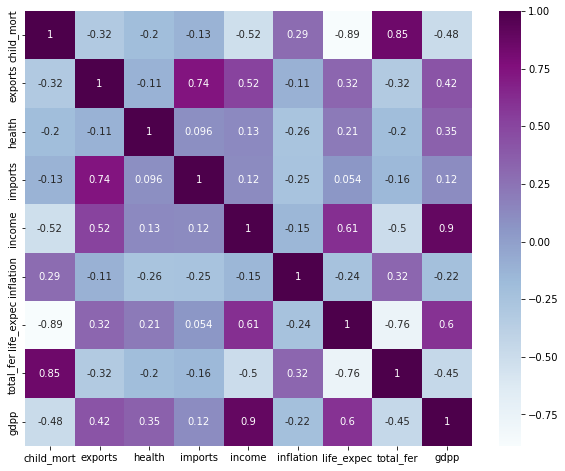

In [48]:
# melihat korelasi 
plt.figure(figsize=(10,8))
sns.heatmap(data_county.corr(), annot=True,  cmap="BuPu")

Kita dapat melihat dari korelasi map diatas, bahwa beberapa fitur memiliki korelasi dengan yang lain (lihat warna yang lebih gelap untuk melihat korelasi yang baik). Itu berarti kita bisa melakukan Pengurangan Dimensi dengan PCA sebelum kita pergi ke Clustering

### Conclusion For EDA
Dari hasil melakukan ekplorasi EDA, kita dapat menarik kesimpulan bahwa :
- Tingkat **GDP**  mempresentasikan kondisi suatu negara apakah baik atau tidak, terlihat juga dari beberapa faktor ekonomi.
- Tingkat **GDP** Rendah mempresentasikan negara-negara yang kesulitas secara ekonomi
- Terlihat juga bahwa tingkat kepuasan hidup dapat mencerminkan apakah suatu negara memiliki kebahagian hidup terutama pada rakyatnya.
- Terlihat juga ada beberapa negara yang mengalami tingkat inflasi yang sangat ekstream, ini disebabkan karena mata uang mereka beredar sangat banyak sehingga mata uang mereka tidak bernilai.


# 5. Data Preprocessing

### Handling Missing Value 

In [49]:
# Mengecek inforamasi missing values
data_county.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Dari informasi diatas terlihat bahwa tidak memiliki null value.

### Scaling

In [51]:
# drop kategorikal data
data_new = data_county.drop(columns=['country'], axis=1)

# initialisasi scaling
# Let's scale the data first
scaler = StandardScaler()
data_new_scaled = scaler.fit_transform(data_new)
data_new_scaled.shape

(167, 9)

### PCA

In [52]:
# declare pca
pca = PCA(whiten=True)
pca.fit(data_new_scaled) #fitting data after scaling

PCA(whiten=True)

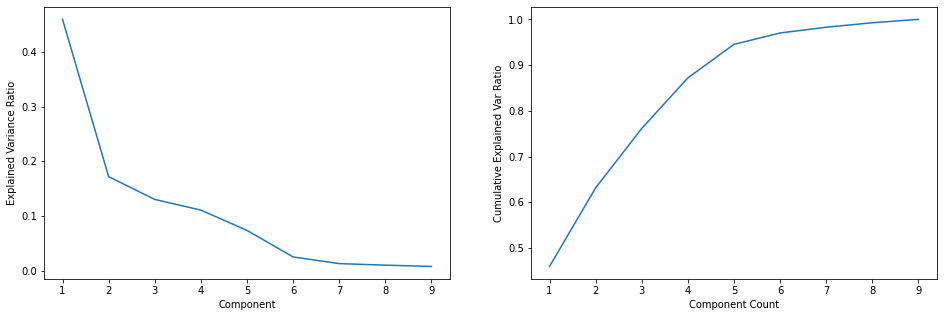

In [55]:
# Visualisasi hasil PCA
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,10),pca.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,10),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Component Count')
ax[1].set_ylabel('Cumulative Explained Var Ratio')
plt.show()

Dari informasi di atas, kita bisa melihat beberapa informasi berikut:
- Terjadi penurunan nilai EVR secara bertahap dari komponen pertama hingga terakhir
- Sepertinya ada patahan untuk komponen ke 2. Tetapi jika kita hanya mengambil komponen ke 2 dalam melakukan reduksi, hanya memiliki cumsum EVR < 0,7. Itu bukan ide yang bagus. Sebaiknya kita akan mengambil komponen yang memiliki EVR > 90

In [57]:
# mengambil 90% dari data asli
pca = PCA(n_components=0.90, whiten=True)
pca.fit(data_new_scaled)

print('Columns with 90% of total data : ', pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

Columns with 90% of total data :  5
0.9453099756439514


Dari hasil menarik informasi hasil reduksi menggunakan bantuan PCA dalam mengambil komponen dengan Nilai EVR > 90. Ternyata kita mendapatkan komponene ke 5. Dengan niali EVR diatas 0.90.

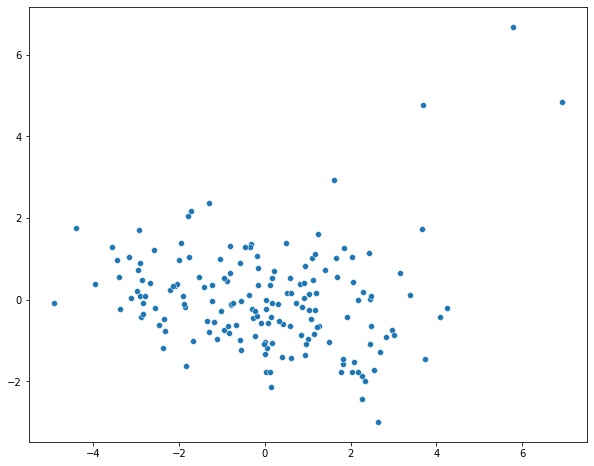

In [58]:
#Plotting
plt.figure(figsize = (10,8))
data_5D = PCA(n_components = 5).fit_transform(data_new_scaled)
sns.scatterplot(x=data_5D[:,0],y=data_5D[:,1]);

Setelah kita melakukuan reduksi menggunakan PCA, selanjutnya kita akan melakukan pemodelan terhadap data yang sudah di reduksi.

Tetapi sebelum melakukan pemodelan kita akan melakukan handling outlier terlebih dahulu. kita akan menggunakan **BayesianGaussianMixture** untuk memabantu kita dalam melakukan handling outlier.

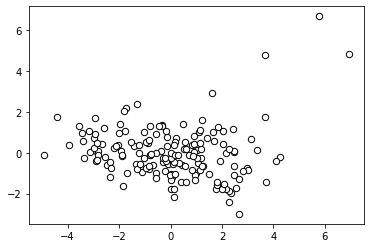

In [59]:
plt.scatter(data_5D[:, 0], data_5D[:, 1], c="white", s=40, edgecolors="k")

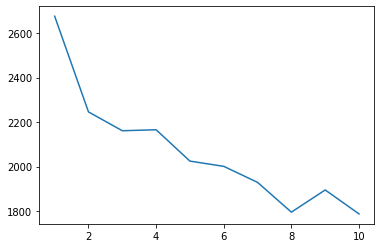

In [60]:
from sklearn.mixture import GaussianMixture

aic = []
for i in range(1,11):
    aic.append(GaussianMixture(n_components=i).fit(data_5D).aic(data_5D))
plt.plot(range(1,11), aic)

Dari hasil inforamasi komponen menggunakan **GaussianMixture** didapat kompoenen 8 untuk handling outlier.

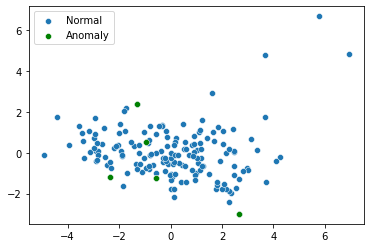

In [64]:
gausMix = GaussianMixture(n_components=8).fit(data_5D)
scores = gausMix.score_samples(data_5D)
thresh = np.quantile(scores, 0.03)

index = np.where(scores <= thresh)
outliers = data_5D[index]

sns.scatterplot(data_5D[:,0], data_5D[:,1],label='Normal')
sns.scatterplot(outliers[:,0],outliers[:,1], color='g', label='Anomaly')
plt.legend()
plt.show()

# 6. Model Definition

Di bagian ini, kita akan mendefinisikan data model.

Kami memutuskan untuk menggunakan model ini dan kemudian kami akan mencari tahu apa pengelompokan terbaik untuk tujuan kami:

Model: K-Means


### Model K-Means

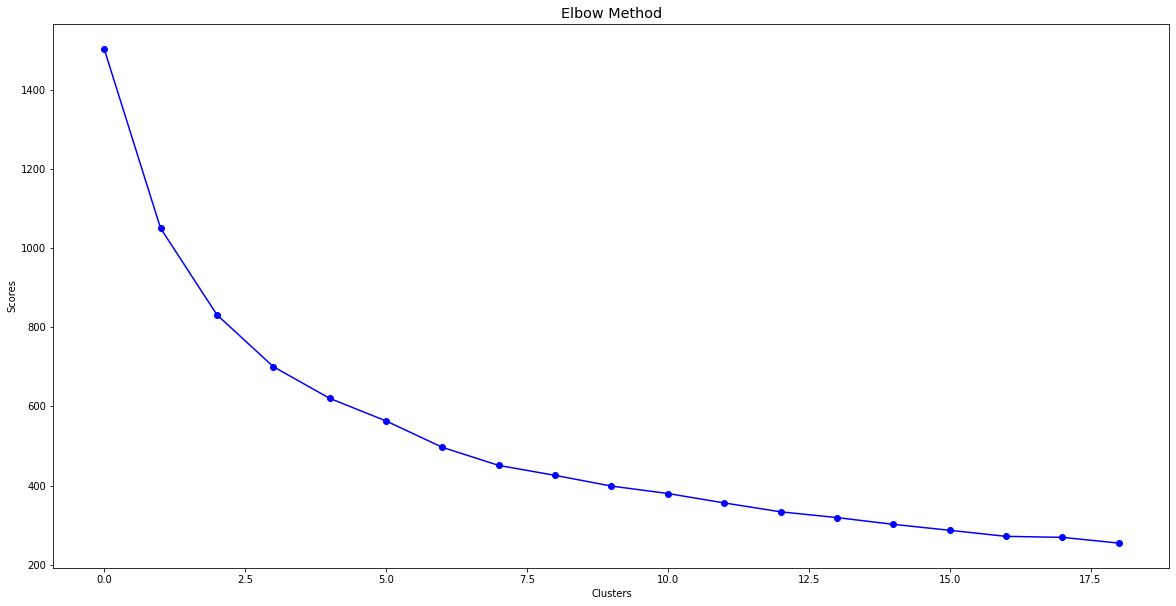

In [65]:
# melakukan Define pada algoritma K-Means
scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_new_scaled)
    scores_1.append(kmeans.inertia_)
plt.figure(figsize = (20, 10))
plt.plot(scores_1, 'bo-')
plt.style.use('ggplot')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Dari informasi di atas, kita bisa melihat bahwa siku berada di cluster ke-7. Mengapa cluster ke-7 adalah siku kita? Karena nilai setelah ke-7 cenderung linier, maka kita akan menggunakan ke-7 sebagai cluster (K) kita.

Jadi kita akan menggunakan cluster 7 untuk KMeans

In [66]:
# n_clusters berdasarkan Elbow 
kmeans = KMeans(n_clusters = 7, random_state=42)
kmeans.fit(data_5D)

KMeans(n_clusters=7, random_state=42)

# 7. Model Evaluation

### Model K-Means

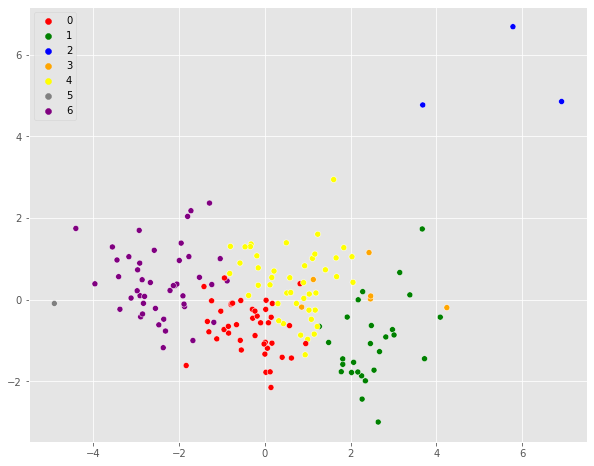

In [67]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = data_5D[:,0], y = data_5D[:,1], hue=kmeans.labels_, palette =['red','green','blue','orange','yellow','gray','purple'])
plt.show()

Di atas adalah scatter plot KMeans dengan 7 Cluster.

Sekarang untuk mengevaluasi algoritma, kita akan menggunakan Metode Silhouette

### Silhouette Method

In [68]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3044199499231817
For n_clusters = 3 The average silhouette_score is : 0.3079769786519015
For n_clusters = 4 The average silhouette_score is : 0.32718347402877207
For n_clusters = 5 The average silhouette_score is : 0.24947155904197027
For n_clusters = 6 The average silhouette_score is : 0.25608199129575815
For n_clusters = 7 The average silhouette_score is : 0.27778429876825045
For n_clusters = 8 The average silhouette_score is : 0.26317927061978275


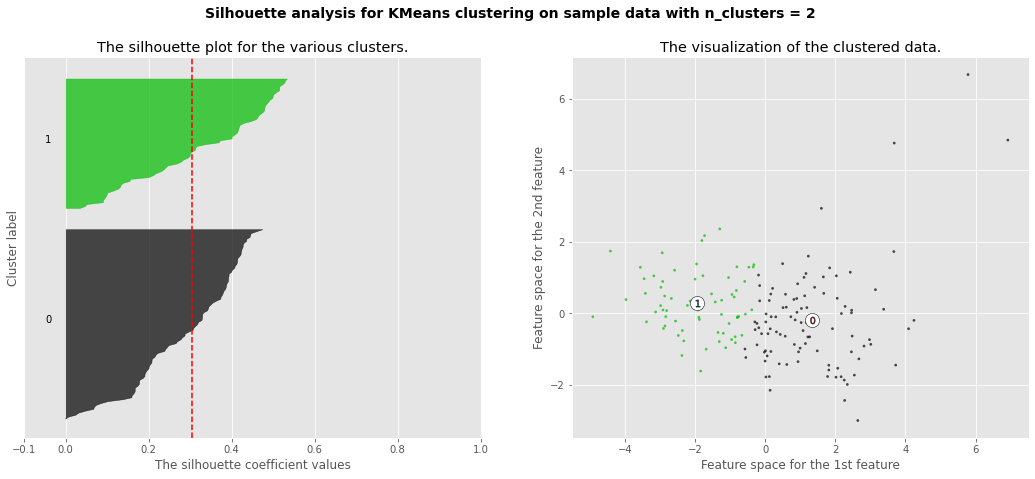

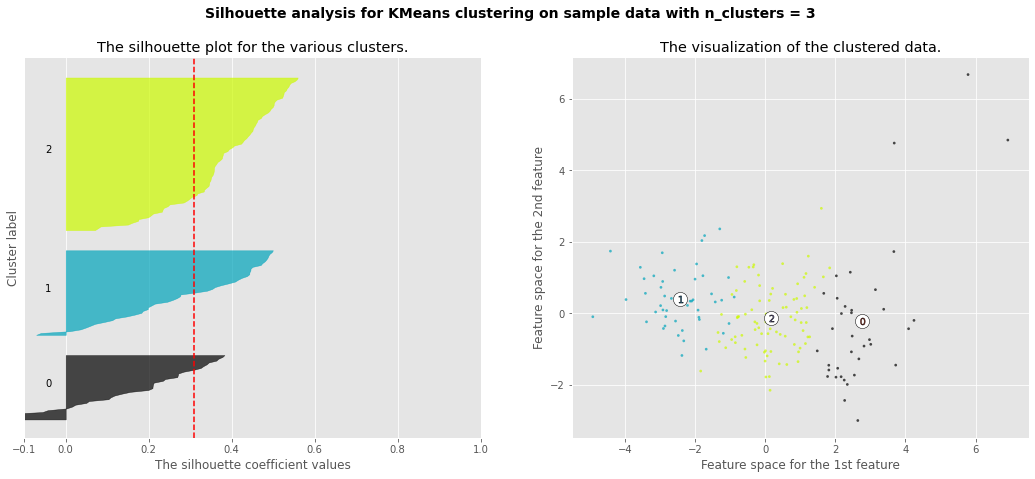

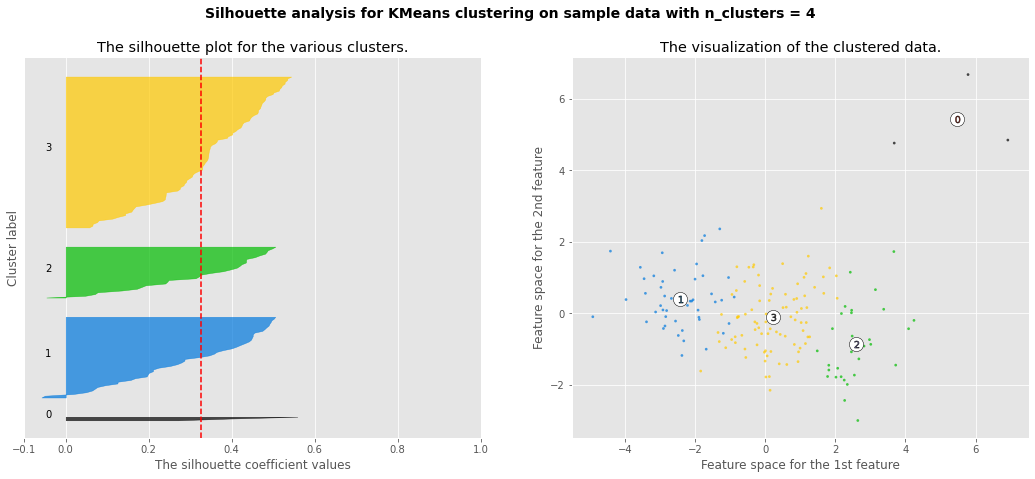

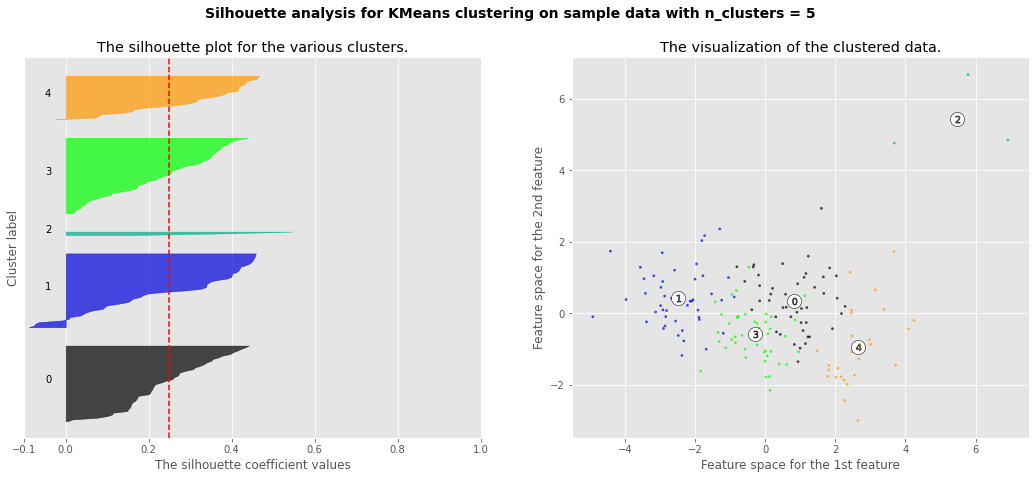

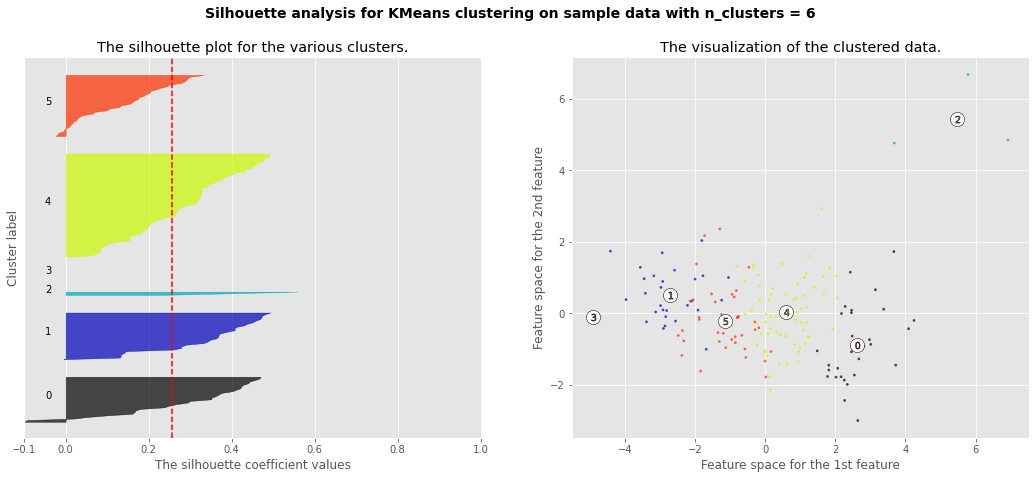

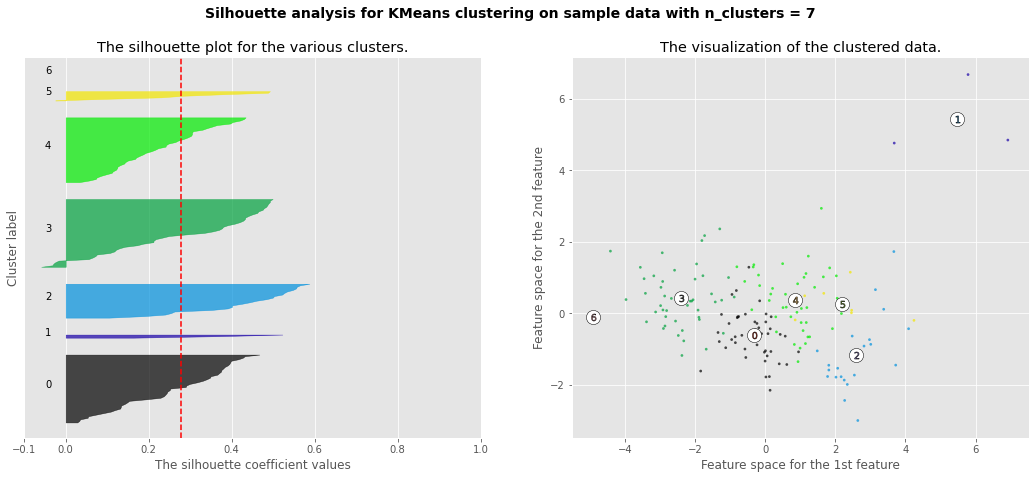

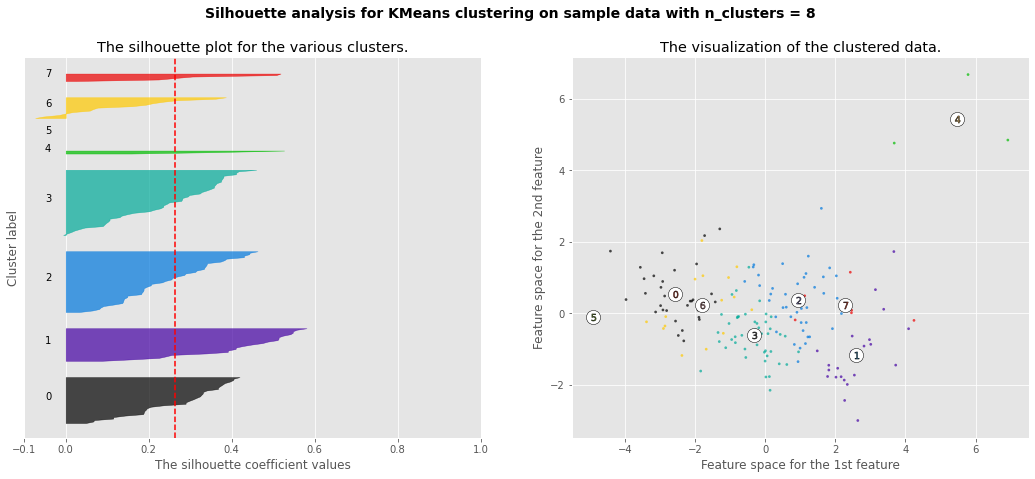

In [71]:
K =[2,3,4,5,6,7,8]
plot_silhouette(K, data_5D)

Dari grafik siluet di atas, kita dapat melihat bahwa cluster yang paling optimal adalah 4, Hmmm, jadi mungkin cluster dari **elbow method** yang kita gunakan tidak terlalu bagus.

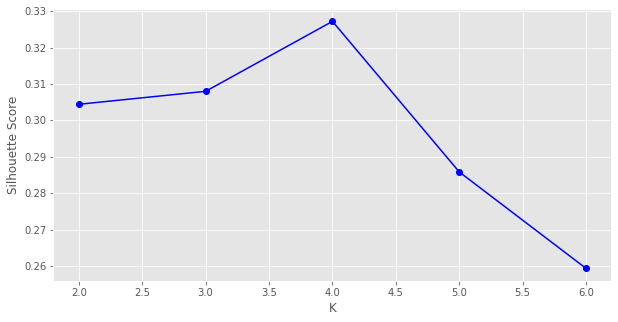

In [75]:
# Mari kita periksa semua skor siluet dari 2 hingga 8
plt.figure(figsize = (10,5))
# Plotting silhouette score
K = [2,3,4,5,6]

s_score=[silhouette_score(data_5D, KMeans(n_clusters=i).fit(data_5D).labels_) for i in K]
plt.plot(K, s_score, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Whoaa ternyata cluster 4 dengan score 0.327 yang paling optimal dari pada cluster 7.

Ini berarti kita harus mengubah K kita untuk kedepannya........................

Dari hasil iformasi diatas dapat kita simpukan bahwa, Kita akan memilih cluster 4 dengan validasi bantuan dari Silhoutte Score. Karena metode Elbow method tidak memberikan informasi secara tepat.

# 8. Model Inference

### Model K-Means

In [76]:
# n_clusters with result of silhouette score
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(data_5D)

KMeans(n_clusters=4, random_state=42)

In [85]:
labels = kmeans.labels_ # membuat variabel labels
# concatenate the new reduced clusters labels to our original dataframe
data_county_new = pd.concat([data_county, pd.DataFrame({'cluster':labels})], axis = 1)
data_county_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


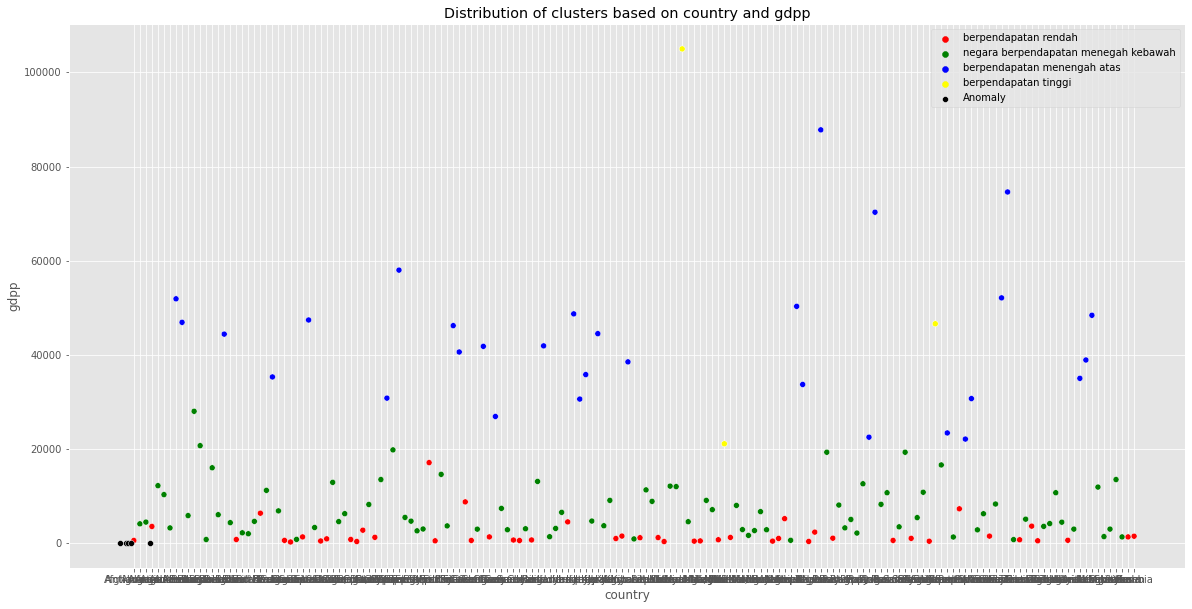

In [109]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data_county_new, x='country', y='gdpp', hue='cluster', palette=['red', 'green', 'blue', 'yellow'])
sns.scatterplot(outliers[:,0],outliers[:,1], color='black', label='Anomaly')
plt.title('Distribution of clusters based on country and gdpp')
plt.show()

### Clustering Anlysis


In [89]:
# menampilkan 5 row
data_county_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


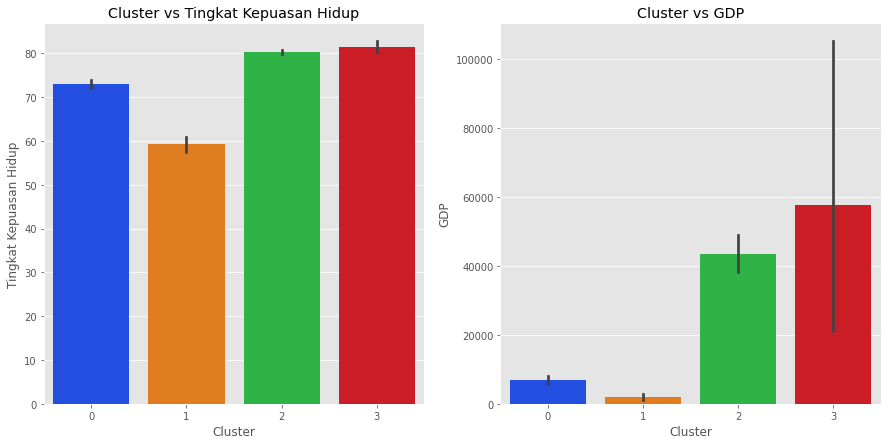

In [106]:
# Melihat informasi dari cluster dengan tingkat kepuasan hidup
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=data_county_new, x='cluster', y='life_expec', palette='bright')
plt.title("Cluster vs Tingkat Kepuasan Hidup")
plt.ylabel("Tingkat Kepuasan Hidup")
plt.xlabel("Cluster")

plt.subplot(1,2,2)
sns.barplot(data=data_county_new, x='cluster', y='gdpp', palette='bright')
plt.title("Cluster vs GDP")
plt.xlabel("Cluster")
plt.ylabel("GDP")
plt.show()

Dari hasil informasi visualisasi diatas terlihat bahwa :
1. Dari informasi Cluster vs Tingkat kepuasan hidup 
    - #cluster 0 memiliki tingkat kepuasan hidup lebih tinggi dari #cluster 1
    - #cluster 1 memiliki tingkat kepuasan hidup terendah
    - #cluster 2 memiliki tingkat kepuasan hidup lebih tinggi dari #cluster 0 dan 1 dan lebih rendah dari #cluster 3
    - #cluster 3 memiliki tingkat kepuasan hidup paling tinggi

2. Dari informasi Cluster vs GDP
    - #cluster 0 memiliki GDP lebih tinggi dibandingkan dengan #cluster 1
    - #cluster 1 memiliki GDP terendah
    - #cluster 2 memiliki GDP lebih tinggi daripada #cluster 0 dan 1, tetapi lebih rendah dari #cluster 3
    - #cluster 3 memiliki GDP lebih tinggi dari cluster yang lain.

Dari hasil informasi diatas. Kita dapat mengambil kesimpulan :
- Cluster 0 adalah negara berpendapatan menegah kebawah
- Cluster 1 adalah negara berpendapatan rendah
- Cluster 2 adalah negara berpendapatan menengah atas
- Cluster 3 adalah negara berpendapatan tinggi

In [108]:
# Mengganti cluster
data_county_new['cluster'].replace({0:'negara berpendapatan menegah kebawah', 1:'berpendapatan rendah', 2:'berpendapatan menengah atas', 3:'berpendapatan tinggi'}, inplace=True)
data_county_new

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,berpendapatan rendah
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,negara berpendapatan menegah kebawah
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,negara berpendapatan menegah kebawah
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,berpendapatan rendah
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,negara berpendapatan menegah kebawah
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,negara berpendapatan menegah kebawah
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,negara berpendapatan menegah kebawah
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,negara berpendapatan menegah kebawah
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,berpendapatan rendah


Setelah melakukan pengelompokkan yang telah kita buat, Kita akan fokus pada cluster dengan **berpendapatan rendah**. karena ini adalah tugas kita untuk menarik informasi berdasarkan cluster yang telah dibuat.

Kenapa saya lebih fokus terhadap **GDP** Karena **GDP** mempresentasikan nilai semua barang dan jasa yang diproduksi selama periode waktu tertentu dalam batas-batas suatu negara. Para ekonom dapat menggunakan **GDP** untuk menentukan apakah suatu ekonomi tumbuh atau mengalami resesi. Investor dapat menggunakan **GDP** untuk membuat keputusan investasi—ekonomi yang buruk berarti pendapatan yang lebih rendah.

**Selanjutnya, saya ingin mencari negara dengan *pendaptan rendah* sebagai fokus kita dalam membaagikan bantuan agar tepat sasaran**

In [119]:
county_ = pd.DataFrame(data_county_new[data_county_new['cluster'] == 'berpendapatan rendah'])
final_country = county_.sort_values(by='gdpp', ascending=True).head(10)
# Final country
pd.Series(final_country['country'].head(10))

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

Dari hasil diatas, dapat kita distibusikan bantuan terhadap 10 Negara diatas.

# 9. Pengambilan Kesimpulan

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?
> Dari hasil ekplorasi dapat kita lihat bahwa, ada beberapa negara yang memiliki **GDP**, **life_expec**, dan **inflation** yang tinggi dan ada juga rendah, Kita akan fokus terhadap **GDP** rendah karena kita akan membuat keputusan untuk membantu negara mana saja yang tepat dalam menerima bantuan, agar tidak salah sasaran.

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
> Dari hasil clustering, saya mendapatkan 4 Clustering. Dengan metode algoritma K-Means, dengan bantuan validasi Silhoutte Score. Didapatkan Cluster optimal adalah 4.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
> Dari hasil clustering, saya mengacu pada **GDP** terhadap suatu negara, Karena itu mempresentasikan negara mana saja yang harus mendapatkann bantuan den, mengelompokkan beberapa negara berdasarkan **GDP**

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
> Dari hasil informasi clustering yang kita dapatkan 
- Cluster 0 adalah negara berpendapatan menegah kebawah
- Cluster 1 adalah negara berpendapatan rendah
- Cluster 2 adalah negara berpendapatan menengah atas
- Cluster 3 adalah negara berpendapatan tinggi

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !
> Dari hasil eda, tentu saja sama, dengan analisa clustering saya...

Dari hasil pengerjaan kita dalam membuat model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara. 

Kita akan fokus kepada cluster #1 karena cluster #1 adalah negara dengan pendapatan rendah yang perlu dibantu dalam kasus ini. Shingga kita dapat melakukan action dengan benar dalam melakukan distribusi bantuan, tanpa adanya kendala dalan memilih negara mana yang perlu dibantu.

Setelah kita melakukan clustering, di dapatkan negara yang perlu diabantu adalah :
1. Burundi
2. iberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

Semoga dengan bantuan machine learning yang telah kita lakukan dapat memberikan informasi dan bantuan dalam melakukan pemilihan negara mana saja yang perlu dibantu.